<a href="https://colab.research.google.com/github/sayak395/Jaynes-Cummings-model/blob/main/Driven_Jaynes_Cummings_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install qutip

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from qutip import (basis, destroy, mesolve, qeye, tensor, create, sigmaz, sigmam, sigmap, fock, Qobj)
from scipy.signal import find_peaks

# System parameters
wc = 1.0 * 2 * np.pi  # cavity frequency
wa = 1.0 * 2 * np.pi  # atom frequency
g = 0.05 * 2 * np.pi # coupling strength
w0 = 1.0 * 2 * np.pi # laser driving frequency
eta = 0.05 * 2 * np.pi # atom-laser coupling
zeta = 0.05 * 2 * np.pi # cavity-laser coupling

# Hilbert space dimension for the cavity
n_cavity = 75

sigma_z_np = np.array([[1 , 0],
                   [0, -1]])
sigma_z_alt = Qobj(sigma_z_np)

sigma_plus_np = np.array([[0, 1],
                   [0, 0]])

sigma_plus_alt = Qobj(sigma_plus_np)

sigma_minus_np = np.transpose(sigma_plus_np)

sigma_minus_alt = Qobj(sigma_minus_np)

def create_a(n):

    matrix = np.zeros((n, n))

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if j == i - 1:
                matrix[i , j] = np.sqrt(i)

    return Qobj(np.transpose(matrix))


###########################
# Define the Operators
###########################

sigma_minus = tensor(qeye(n_cavity), sigma_minus_alt) # atomic lowering operator
sigma_plus =  tensor(qeye(n_cavity), sigma_plus_alt)  # atomic raising operator
sigma_z = tensor(qeye(n_cavity), sigma_z_alt)     # atomic z operator
a = tensor(create_a(n_cavity), qeye(2))   # cavity annihilation operator
spin_down = fock(2, 1)
spin_up = fock(2, 0)


In [11]:
delta_c = wc - w0
delta_a = wa - w0

times = np.arange(0, 10, 1e9)
tau = wc * times

In [16]:
H_driven_RWA = delta_c * a.dag() * a + 0.5 * delta_a * sigma_z + g * (sigma_plus * a + sigma_minus * a.dag())
+ eta * (sigma_plus + sigma_minus) + zeta * (a + a.dag())

psi = tensor(fock(n_cavity, 5), spin_up)

In [17]:
result = mesolve(H_driven_RWA, psi, tau, c_ops = [], e_ops = [a.dag() * a, sigma_plus * sigma_minus])

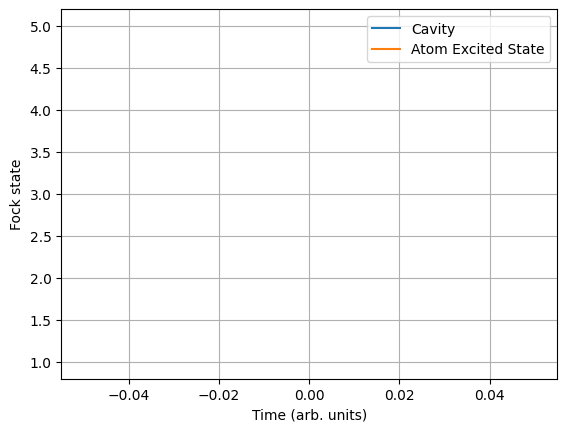

In [18]:
n_c = result.expect[0]
n_a = result.expect[1]

plt.figure()
plt.plot(tau, n_c, label = 'Cavity')
plt.plot(tau, n_a, label = 'Atom Excited State')
plt.grid(True)
plt.xlabel('Time (arb. units)')
plt.ylabel('Fock state')
plt.legend(loc='best')
plt.show()

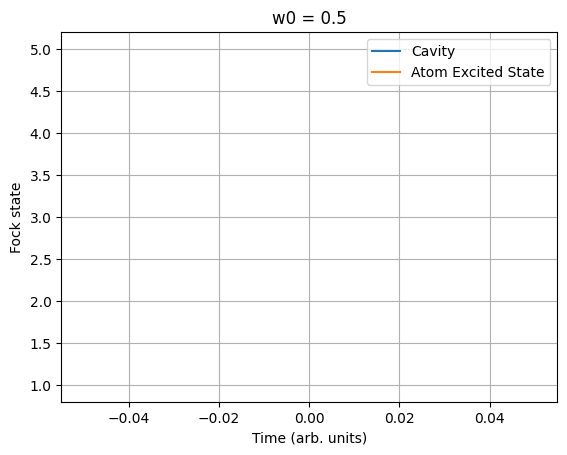

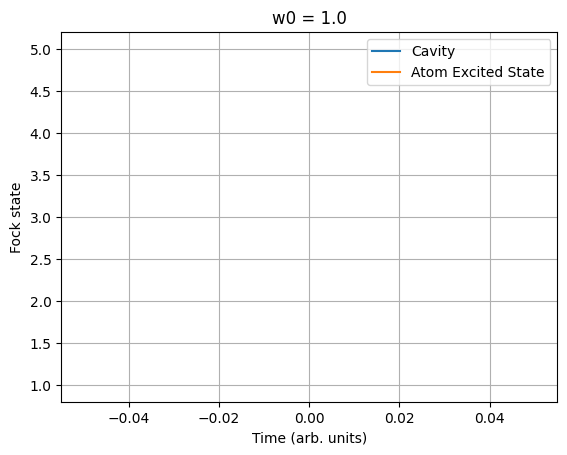

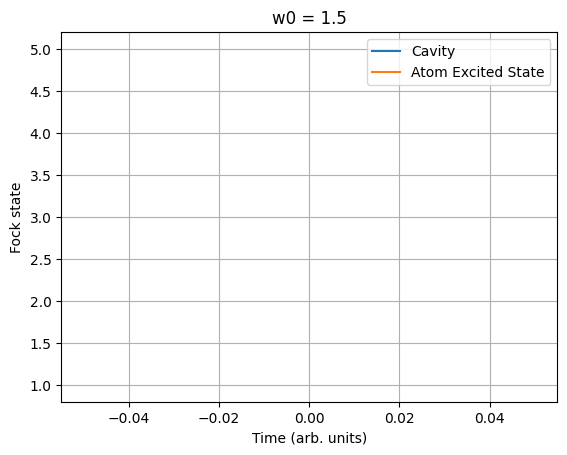

In [19]:
# prompt: using the code above, generate a list for the w0 values and then iterate through them and plot the results, exactly like how I have done in the cells above

import matplotlib.pyplot as plt
import numpy as np
w0_values = [0.5 * 2 * np.pi, 1.0 * 2 * np.pi, 1.5 * 2 * np.pi] # Example w0 values

for w0 in w0_values:
  # System parameters (using the w0 value from the loop)
  wc = 1.0 * 2 * np.pi  # cavity frequency
  wa = 1.0 * 2 * np.pi  # atom frequency
  g = 0.05 * 2 * np.pi # coupling strength
  eta = 0.05 * 2 * np.pi # atom-laser coupling
  zeta = 0.05 * 2 * np.pi # cavity-laser coupling

  delta_c = wc - w0
  delta_a = wa - w0

  times = np.arange(0, 10, 1e9)
  tau = wc * times
  H_driven_RWA = delta_c * a.dag() * a + 0.5 * delta_a * sigma_z + g * (sigma_plus * a + sigma_minus * a.dag()) \
                + eta * (sigma_plus + sigma_minus) + zeta * (a + a.dag())

  psi = tensor(fock(n_cavity, 5), spin_up)
  result = mesolve(H_driven_RWA, psi, tau, c_ops = [], e_ops = [a.dag() * a, sigma_plus * sigma_minus])
  n_c = result.expect[0]
  n_a = result.expect[1]

  plt.figure()
  plt.plot(tau, n_c, label = 'Cavity')
  plt.plot(tau, n_a, label = 'Atom Excited State')
  plt.grid(True)
  plt.xlabel('Time (arb. units)')
  plt.ylabel('Fock state')
  plt.title(f'w0 = {w0 / (2 * np.pi)}') # Added title to distinguish plots
  plt.legend(loc='best')
  plt.show()
